# Alucar - Analisando assinantes newsletter

In [1]:
import pandas as pd
assinantes = pd.read_csv('newsletter_alucar.csv')

assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [2]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [3]:
print('Quantidade de linhas e colunas: ', assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [4]:
assinantes['mes'] = pd.to_datetime(assinantes.mes)
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [5]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('Accent')
sns.set_style('darkgrid')

def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)

C:\Users\Saulo\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


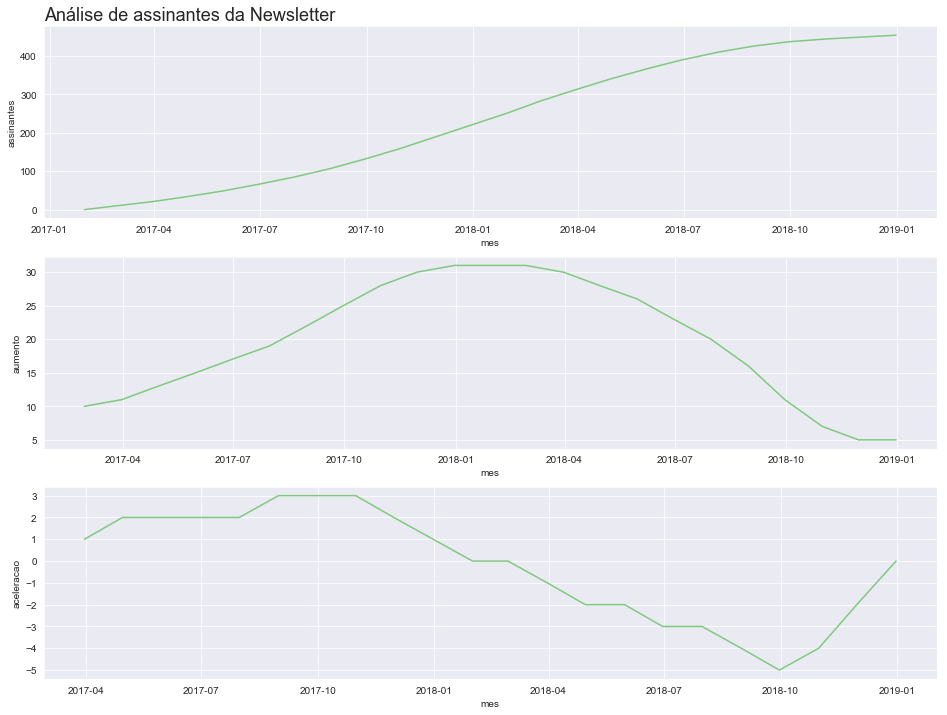

In [7]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da Newsletter')

## Chocolura

In [8]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [9]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [10]:
chocolura['mes'] = pd.to_datetime(chocolura.mes)

In [11]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [12]:
print('Quantidade de linhas e colunas: ', chocolura.shape)
print('Quantidade de dados nulos: ', chocolura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [13]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


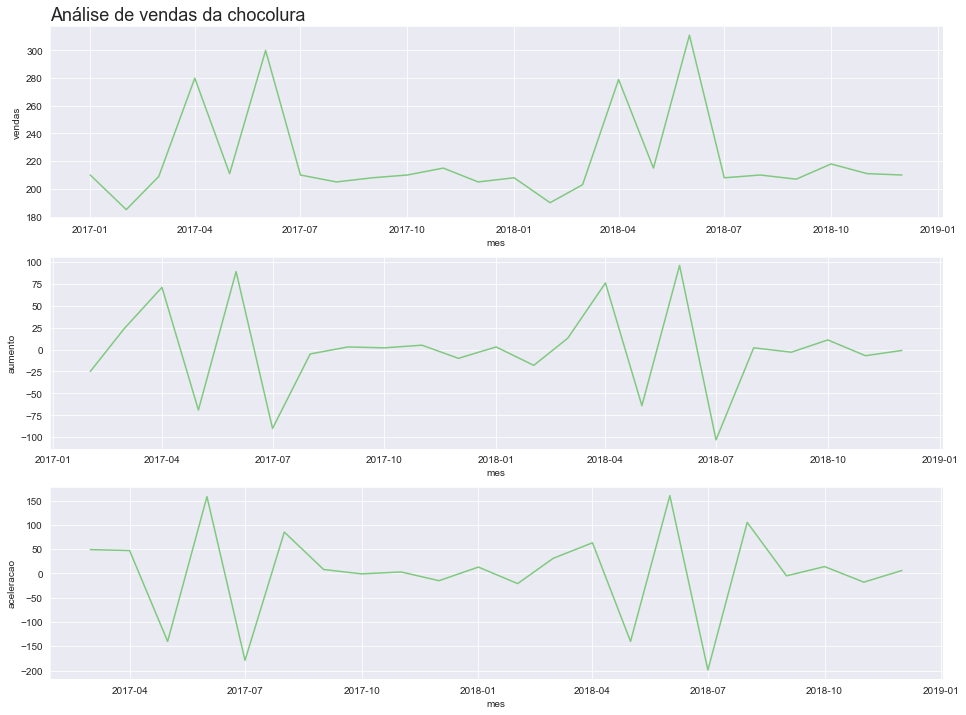

In [14]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da chocolura')

## Sazonalidade  

A empresa tende a vender mais nos meses de março e junho

## Chocolura - Vendas Diárias (Outubro, Novembro)

In [15]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [16]:
print('Quantidade de linhas e colunas: ', vendas_por_dia.shape)
print('Quantidade de dados nulos: ', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [17]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [18]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia.dia)

In [19]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [20]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


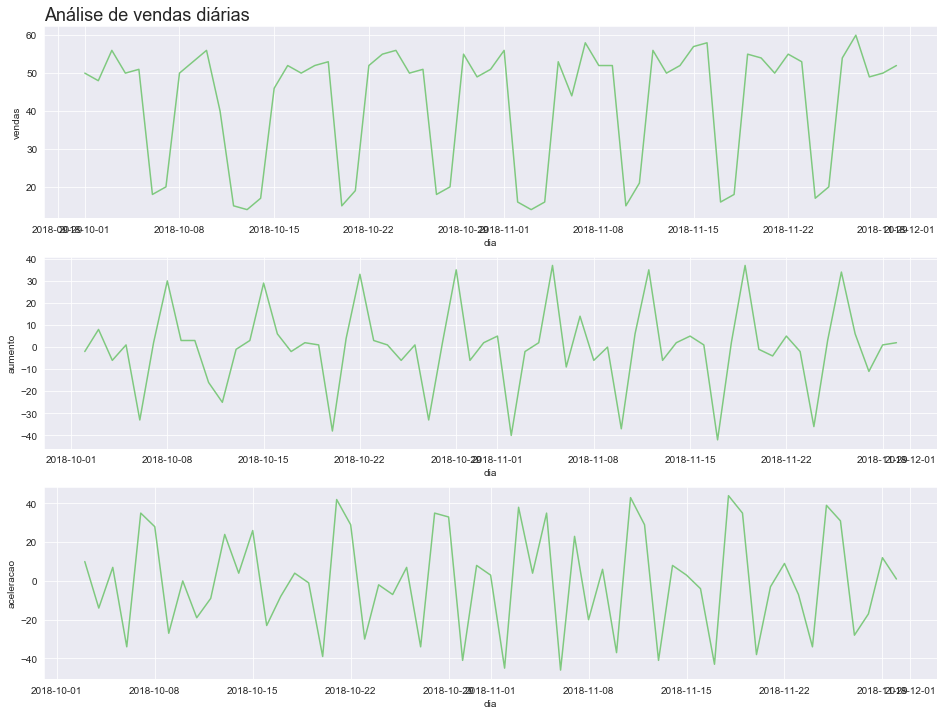

In [21]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas diárias')

## Analisando a sazonalidade

In [22]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia.dia.dt.weekday_name
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday
7,2018-10-08,50,30.0,28.0,Monday
8,2018-10-09,53,3.0,-27.0,Tuesday
9,2018-10-10,56,3.0,0.0,Wednesday


In [23]:
vendas_agrupado = vendas_por_dia.groupby('dia_da_semana').mean()
vendas_agrupado

,vendas,aumento,aceleracao
dia_da_semana,,,
Friday,44.555556,-6.777778,-5.000000
Monday,52.333333,33.750000,30.750000
Saturday,15.875000,-27.750000,-19.875000
Sunday,18.875000,3.000000,30.750000
Thursday,51.333333,-1.777778,-3.222222
Tuesday,51.666667,-0.666667,-34.250000
Wednesday,53.111111,1.444444,2.111111


## Correlação das vendas

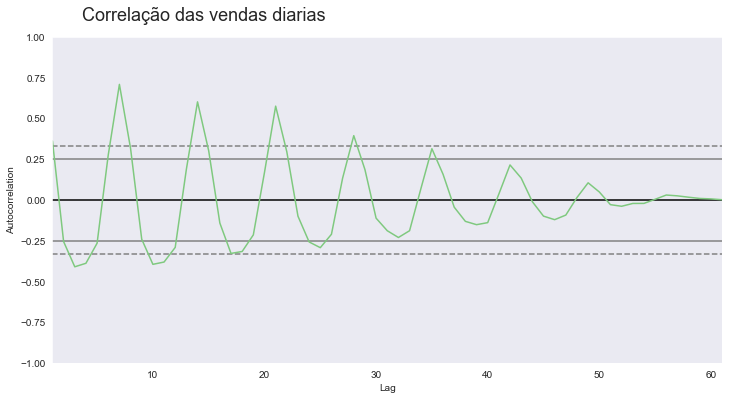

In [25]:
from pandas.plotting import autocorrelation_plot
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diarias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia.vendas)
ax=ax

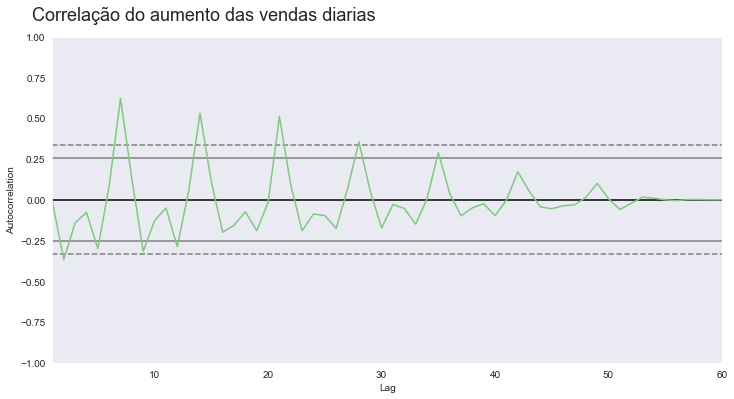

In [26]:
from pandas.plotting import autocorrelation_plot
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diarias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia.aumento[1:])
ax=ax

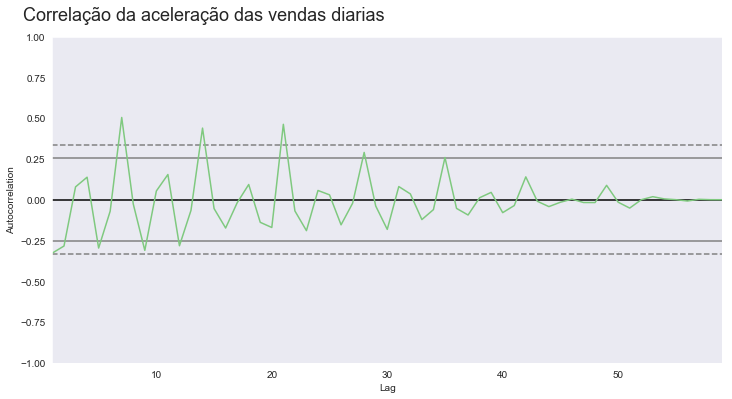

In [27]:
from pandas.plotting import autocorrelation_plot
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diarias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia.aceleracao[2:])
ax=ax